<a href="https://colab.research.google.com/github/vidulaarumugam/Vidula_zeotap/blob/master/Vidula_N_A_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn scikit-learn

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

print(customers_df.info())
print(products_df.info())
print(transactions_df.info())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3       

DATA CLEANING

In [4]:
# Convert 'SignupDate' and 'TransactionDate' to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Check and handle missing values
customers_df.dropna(inplace=True)
products_df.dropna(inplace=True)
transactions_df.dropna(inplace=True)

# Remove duplicates
customers_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
transactions_df.drop_duplicates(inplace=True)


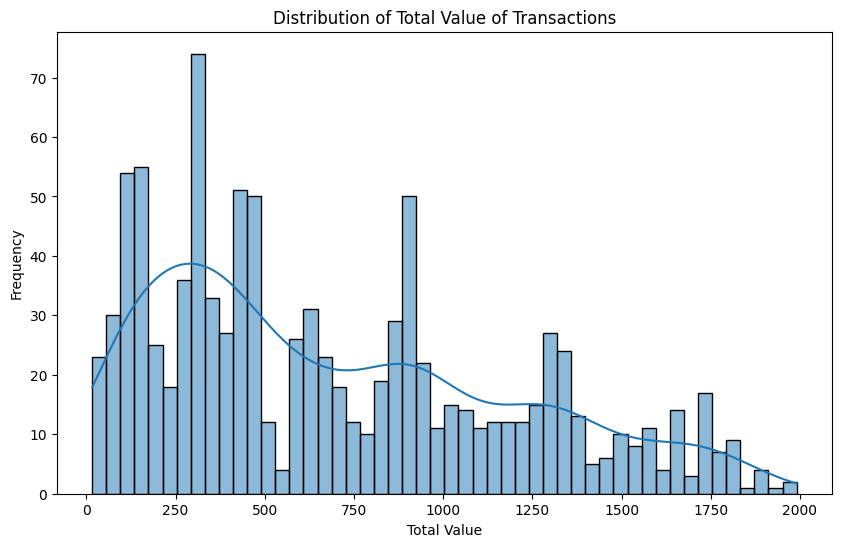

In [5]:
# Distribution of total transaction value
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['TotalValue'], bins=50, kde=True)
plt.title('Distribution of Total Value of Transactions')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()


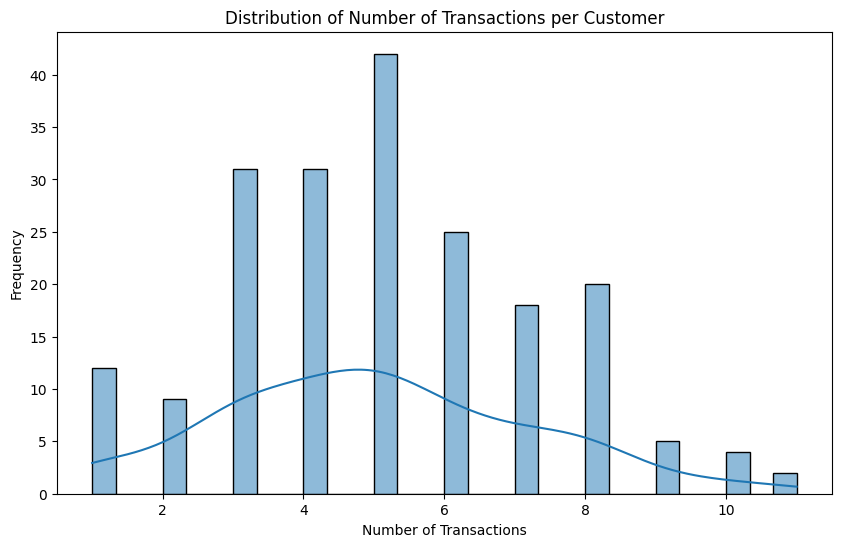

In [6]:
# Number of transactions per customer
customer_transactions = transactions_df.groupby('CustomerID').size()
plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions, bins=30, kde=True)
plt.title('Distribution of Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


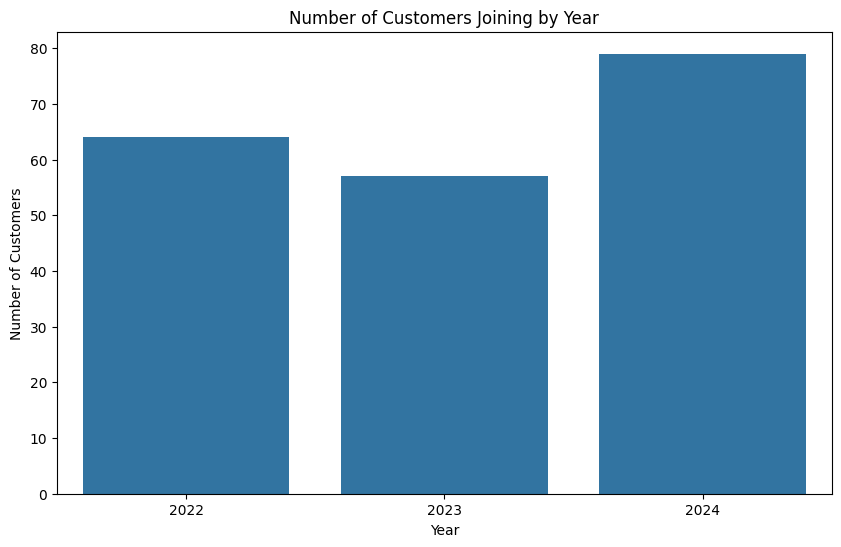

In [7]:
# Customers joined over time
plt.figure(figsize=(10, 6))
sns.countplot(x=customers_df['SignupDate'].dt.year)
plt.title('Number of Customers Joining by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()


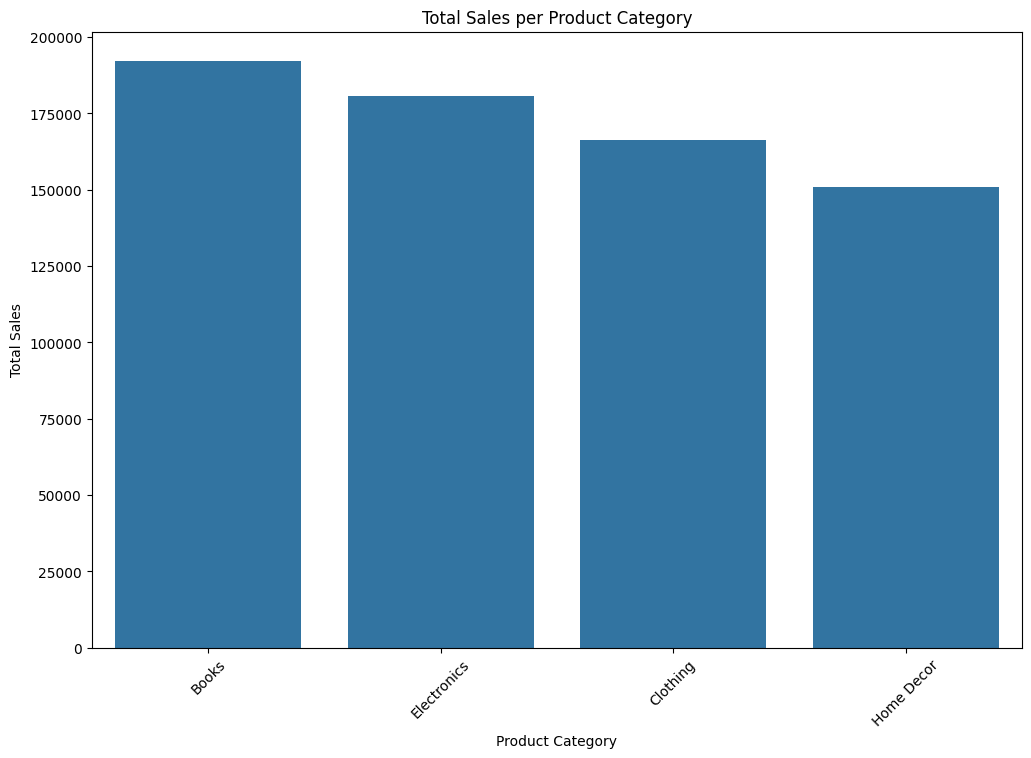

In [8]:
# Merge transactions with product categories
product_sales = transactions_df.merge(products_df[['ProductID', 'Category']], on='ProductID')
category_sales = product_sales.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
